MICRODADOS DO ENEM 2020 QUE EU FIZ UMA SEPARAÇÃO COM A MÉDIA DAS NOTAS POR DISCIPLINAS,REGIÃO, SEXO, ETNIA.TAMBÉM A JUNÇÃO DOS DOIS DADOS PARA MELHOR ANALIZE. Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem.



### ⭐⭐⭐⭐⭐ENGENAHRIA DE DADOS

In [1]:
# Principais pacotes utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#carregando os dados em CSV fazendo a ingestão de dados da planilha e também codificando para que não haja problemas de formato
#sep = Separação por ; dos dados // encoding = codificador dos dados da planilha.

print(os.listdir("../input"))

dados = pd.read_csv("../input/microdadosenem-2020/MICRODADOS_ENEM_2020.csv", sep=';', encoding="ISO-8859-1")

['ml-olympiad-quality-education-eda-modelagem', 'microdadosenem-2020', 'microdados-enem', 'brazilian-national-test-enem-from-2016-2020']


In [3]:
#Filtrando algumas colunas para melhor analise do conjunto de dados.

dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [4]:
#Como há muitas colunas desnecessarias, realizamos um tratamento na tapela de dados deixando somente o essencial.

DadosEnem = ['NU_INSCRICAO','TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'NU_NOTA_REDACAO','NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO']

In [5]:
#Realizamos a conversão de dados numéricos em dados rotulados (ETL - Tratamento).

cor = {
               0 : "Não Declarado",
               1 : "Branco",
               2 : "Preto",
               3:  "Pardo",
               4 : "Amarelo",
               5 : "Indígena"
               }
               
                 
dados["TP_COR_RACA"] = dados["TP_COR_RACA"].replace(cor)

print(cor)

{0: 'Não Declarado', 1: 'Branco', 2: 'Preto', 3: 'Pardo', 4: 'Amarelo', 5: 'Indígena'}


In [6]:
#Utilizando a função filtro, somente retornará valores das colunas selecionadas (ETL - Tratamento).

Data = dados.filter(DadosEnem)

In [7]:
Data.head(3)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,...,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,200006271946,11,F,Preto,1,11,1,NaN,0,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,11,M,Pardo,1,11,1,NaN,0,NaN,...,1,1,1,1,580.0,711.3,604.1,661.7,595.3,580.0
2,200001943954,4,F,Pardo,2,0,2,1.0,0,2927408.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(dados.columns)

76

In [9]:
# Contagem de número de inscritos 

n = len(pd.unique(dados['NU_INSCRICAO']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 5783109


In [10]:
percent_missing = Data.isnull().sum() * 100 / len(Data)
missing_value_df = pd.DataFrame({'column_name': Data.columns,
                                 'percent_missing': percent_missing})

In [11]:
# percentual de valores nulos por recurso 

missing_value_df

,column_name,percent_missing
NU_INSCRICAO,NU_INSCRICAO,0.000000
TP_FAIXA_ETARIA,TP_FAIXA_ETARIA,0.000000
TP_SEXO,TP_SEXO,0.000000
TP_COR_RACA,TP_COR_RACA,0.000000
TP_ST_CONCLUSAO,TP_ST_CONCLUSAO,0.000000
TP_ANO_CONCLUIU,TP_ANO_CONCLUIU,0.000000
TP_ESCOLA,TP_ESCOLA,0.000000
TP_ENSINO,TP_ENSINO,77.461155
IN_TREINEIRO,IN_TREINEIRO,0.000000
CO_MUNICIPIO_ESC,CO_MUNICIPIO_ESC,84.358431


In [12]:
#Vamos tirar todos os valores NAN(NOT A NUMBER), que são os valores de quem não foi.

Data = Data.dropna()

In [13]:

Data = Data.assign(media=0)
Data.head(1)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,...,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_REDACAO,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
3,200001908998,2,M,Pardo,2,0,2,1.0,0,3547304.0,...,1,1,1,760.0,759.4,620.8,675.0,624.2,760.0,0


In [14]:
#Com a coluna média adicionada, vamos faze-lá funcionar.
#Fazer o somatorio das colunas das 5 notas das diferentes disciplinas e / 5.

lista = ['NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO','media']
ListaNotas = dados.filter(items=lista)

In [15]:
ListaNotas = ListaNotas.assign(media=0)
ListaNotas.head(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
0,NaN,NaN,NaN,NaN,NaN,0
1,711.3,604.1,661.7,595.3,580.0,0
2,NaN,NaN,NaN,NaN,NaN,0
3,759.4,620.8,675.0,624.2,760.0,0
4,NaN,NaN,NaN,NaN,NaN,0


In [16]:
ListaNotas.dropna()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
1,711.3,604.1,661.7,595.3,580.0,0
3,759.4,620.8,675.0,624.2,760.0,0
5,526.7,498.1,604.7,505.4,700.0,0
7,753.2,604.6,604.8,562.1,600.0,0
8,448.5,439.7,383.5,486.2,600.0,0
...,...,...,...,...,...,...
5783103,469.1,547.3,613.3,596.4,660.0,0
5783104,725.7,508.3,661.4,658.3,900.0,0
5783105,719.5,570.5,646.1,607.2,660.0,0
5783106,648.1,418.8,597.5,674.5,660.0,0


In [17]:
dados['media'] = (ListaNotas['NU_NOTA_CH'] + ListaNotas['NU_NOTA_CN']+ ListaNotas['NU_NOTA_MT'] + 
                       ListaNotas['NU_NOTA_REDACAO'] + ListaNotas['NU_NOTA_LC'])//5

In [18]:
ListaNotas.head(5)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
0,NaN,NaN,NaN,NaN,NaN,0
1,711.3,604.1,661.7,595.3,580.0,0
2,NaN,NaN,NaN,NaN,NaN,0
3,759.4,620.8,675.0,624.2,760.0,0
4,NaN,NaN,NaN,NaN,NaN,0


In [19]:
ListaNotas.dropna()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,media
1,711.3,604.1,661.7,595.3,580.0,0
3,759.4,620.8,675.0,624.2,760.0,0
5,526.7,498.1,604.7,505.4,700.0,0
7,753.2,604.6,604.8,562.1,600.0,0
8,448.5,439.7,383.5,486.2,600.0,0
...,...,...,...,...,...,...
5783103,469.1,547.3,613.3,596.4,660.0,0
5783104,725.7,508.3,661.4,658.3,900.0,0
5783105,719.5,570.5,646.1,607.2,660.0,0
5783106,648.1,418.8,597.5,674.5,660.0,0


### ⭐⭐⭐⭐⭐Análise de Dados

In [20]:
NotaMT = ['NU_INSCRICAO','NU_NOTA_MT']

NotaMT = dados.filter(items=NotaMT)

NotaMT.head()

,NU_INSCRICAO,NU_NOTA_MT
0,200006271946,NaN
1,200001195856,711.3
2,200001943954,NaN
3,200001908998,759.4
4,200001634757,NaN


In [21]:
NotaCN = ['NU_INSCRICAO','NU_NOTA_CN']

NotaCN = dados.filter(items=NotaCN)

NotaCN.head()

,NU_INSCRICAO,NU_NOTA_CN
0,200006271946,NaN
1,200001195856,604.1
2,200001943954,NaN
3,200001908998,620.8
4,200001634757,NaN


In [22]:
#Media de nota da melhor inscrição ou seja do melhor aluno
NotaNU = ['NU_INSCRICAO','media']

NotaNU = dados.filter(items=NotaNU)

NotaNU.head()

,NU_INSCRICAO,media
0,200006271946,NaN
1,200001195856,630.0
2,200001943954,NaN
3,200001908998,687.0
4,200001634757,NaN


In [23]:
#Media de nota entre o tipo de escola por exemplo pública, privada
NotaEsc = ['TP_ESCOLA','media']

NotaEsc = dados.filter(items=NotaEsc)

NotaEsc.head()

,TP_ESCOLA,media
0,1,NaN
1,1,630.0
2,2,NaN
3,2,687.0
4,1,NaN


In [24]:
#Media de nota entre sexo masculino e feminino.
NotaSexo = ['TP_SEXO','media']

NotaSexo = dados.filter(items=NotaSexo)

NotaSexo.head()

,TP_SEXO,media
0,F,NaN
1,M,630.0
2,F,NaN
3,M,687.0
4,F,NaN


In [25]:
NotaSexo = NotaSexo.dropna()
NotaEsc= NotaEsc.dropna()
NotaNU= NotaNU.dropna()
NotaMT= NotaMT.dropna()
NotaCN= NotaCN.dropna()

In [26]:
mediana = NotaSexo.groupby('TP_SEXO').median()
mediana

,media
TP_SEXO,
F,509.0
M,529.0


In [27]:
NotaSexo.groupby('TP_SEXO').describe()

media                                                        
             count        mean        std  min    25%    50%    75%    max
TP_SEXO                                                                   
F        1564051.0  520.754447  89.805201  0.0  455.0  509.0  579.0  851.0
M        1024630.0  534.234753  93.148418  0.0  467.0  529.0  597.0  858.0

In [28]:
NotaEsc.groupby('TP_ESCOLA').describe()

media                                                          
               count        mean        std    min    25%    50%    75%    max
TP_ESCOLA                                                                     
1          1774679.0  525.447684  91.048282    0.0  459.0  515.0  585.0  858.0
2           650857.0  507.970333  82.850344    0.0  449.0  501.0  562.0  843.0
3           163145.0  605.366098  85.685493  133.0  546.0  611.0  669.0  852.0

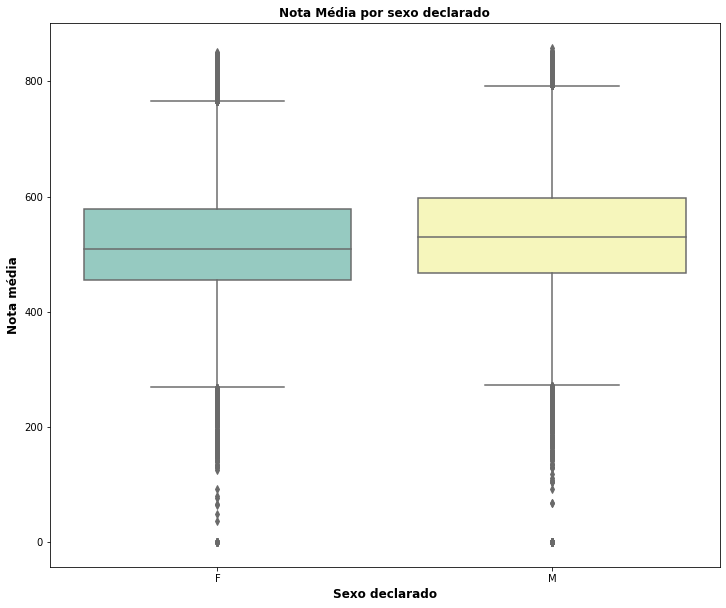

In [29]:
#Agora vamos analisar graficamente os dados das medias entre os sexos.
media = 'media'

fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(x="TP_SEXO", y=media, data=dados,
           palette="Set3", ax=ax)

ax.set_title("Nota Média por sexo declarado", fontsize=12, fontweight='bold')
ax.set_ylabel("Nota média", fontsize=12, fontweight='bold')
ax.set_xlabel("Sexo declarado", fontsize=12, fontweight='bold')

plt.show()

In [30]:
#Agora um grafico para analizarmos a media das pessoas por etnia/raça.

NotasCor = ['TP_COR_RACA','media']
NotasCor = dados.filter(items=NotasCor)

In [31]:

NotasESC = ['TP_ESCOLA','media']
NotasESC = dados.filter(items=NotasESC).copy()

In [32]:
NotasESC.head(4)

,TP_ESCOLA,media
0,1,NaN
1,1,630.0
2,2,NaN
3,2,687.0


In [33]:
NotasCor.head(4)

,TP_COR_RACA,media
0,Preto,NaN
1,Pardo,630.0
2,Pardo,NaN
3,Pardo,687.0


In [34]:
NotasCor = NotasCor.dropna()
NotasESC = NotasESC.dropna()

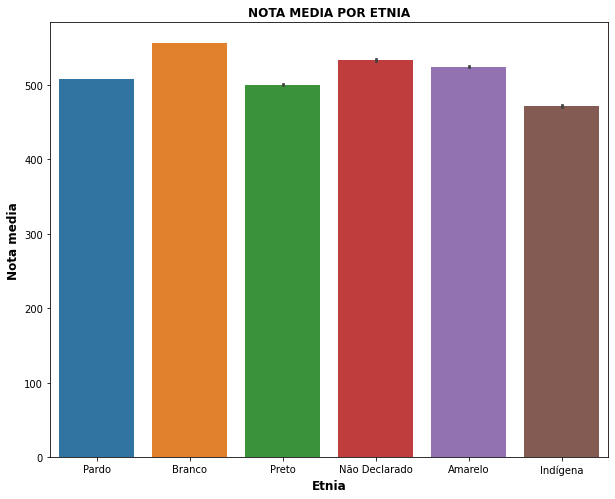

In [35]:
#Desenhando também os graficos por etnia

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='TP_COR_RACA', y='media', data=NotasCor)

ax.set_title("NOTA MEDIA POR ETNIA", fontsize=12, fontweight='bold')
ax.set_xlabel("Etnia", fontsize=12, fontweight='bold')
ax.set_ylabel("Nota media", fontsize=12, fontweight='bold')

plt.show()

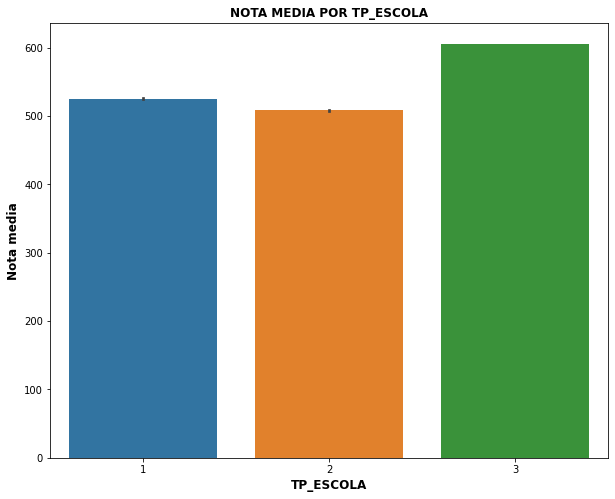

In [36]:
#Desenhando também os graficos por TP_ESCOLA

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='TP_ESCOLA', y='media', data=NotasESC)

ax.set_title("NOTA MEDIA POR TP_ESCOLA", fontsize=12, fontweight='bold')
ax.set_xlabel("TP_ESCOLA", fontsize=12, fontweight='bold')
ax.set_ylabel("Nota media", fontsize=12, fontweight='bold')

plt.show()

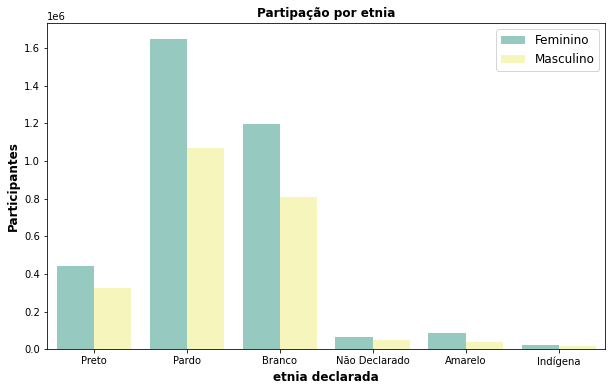

In [37]:

fig, ax = plt.subplots(figsize=(10, 6))


sns.countplot(data=dados, x="TP_COR_RACA",
            hue="TP_SEXO", palette="Set3", ax=ax)


ax.set_title("Partipação por etnia", fontsize=12, fontweight='bold')
ax.set_ylabel("Participantes", fontsize=12, fontweight='bold')
ax.set_xlabel("etnia declarada", fontsize=12, fontweight='bold') 
ax.legend(["Feminino", "Masculino"], fontsize=12)

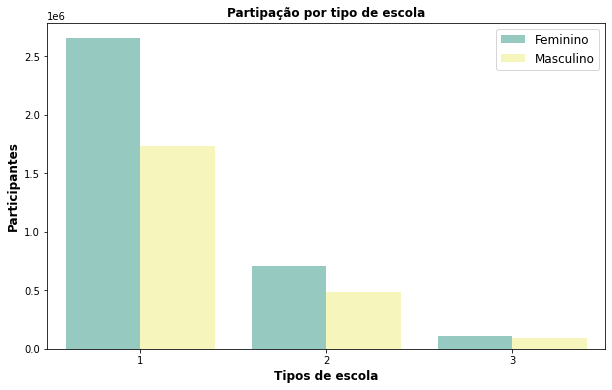

In [38]:

fig, ax = plt.subplots(figsize=(10, 6))


sns.countplot(data=dados, x="TP_ESCOLA",
            hue="TP_SEXO", palette="Set3", ax=ax)


ax.set_title("Partipação por tipo de escola", fontsize=12, fontweight='bold')
ax.set_ylabel("Participantes", fontsize=12, fontweight='bold')
ax.set_xlabel("Tipos de escola", fontsize=12, fontweight='bold') 
ax.legend(["Feminino", "Masculino"], fontsize=12)